In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df = pd.read_csv('BREAST_CANCER_DATA copy.csv')

In [ ]:
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
# Id column is redundant and not useful, we want to drop it
df.drop('id', axis =1, inplace=True)
# df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38           122.8     1001.0   
1         M        20.57         17.77           132.9     1326.0   
2         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33            184.6      2019.0   
1         0.1812  ...          23.41            158.8      1956.0   
2         0.2069  ...          25.53            152.5      1709.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  
0          0.4601                  0.11890          NaN  
1          0.2750                  0.08902          NaN  
2          0.3613                  0.08758          NaN  

[3 rows x 32 columns]

In [ ]:
df.shape

(569, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.isnull().any()


diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [ ]:
unnamed_32_count = df['Unnamed: 32'].isna().sum()
unnamed_32_count

569

In [ ]:
df.drop('Unnamed: 32', axis =1, inplace=True)

In [ ]:
df.head(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
%matplotlib inline

from scipy.stats import norm
import seaborn as sns # data visualization


plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['axes.titlesize'] = 'large'


In [ ]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [ ]:
df.skew()

<ipython-input-13-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [ ]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
diag_gr = df.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

# of observations
diagnosis                   
B                        357
M                        212

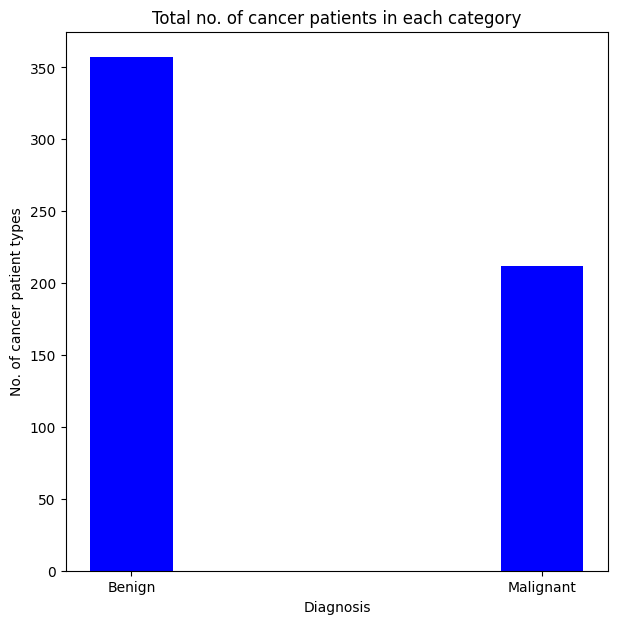

In [ ]:
data = {'Benign':357, 'Malignant':212}

diagnosis = list(data.keys())
count = list(data.values())

fig = plt.figure(figsize = (7,7))

plt.bar(diagnosis, count, color = 'blue', width = 0.2)

plt.xlabel("Diagnosis")
plt.ylabel("No. of cancer patient types")
plt.title("Total no. of cancer patients in each category")
plt.show()

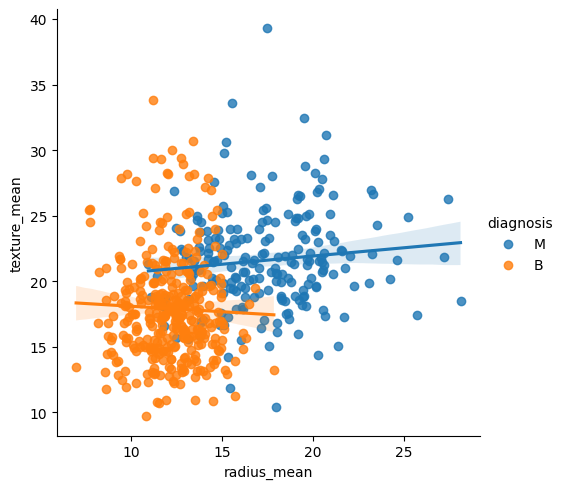

In [ ]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)


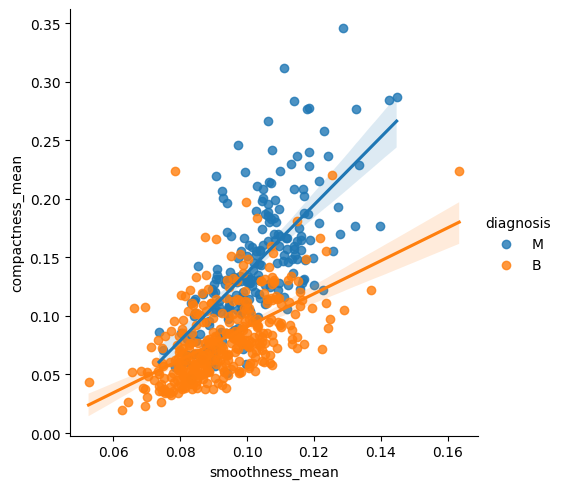

In [ ]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean',
		data = df, hue = 'diagnosis')


In [ ]:
#Break up columns into groups, according to their suffix designation
#(_mean, _se,and __worst) to perform visualisation plots off.

df_diag=df.loc[:,["diagnosis"]]

#For a merge + slice:
df_mean=df.iloc[:,1:11]
df_se=df.iloc[:,11:22]
df_worst=df.iloc[:,23:]



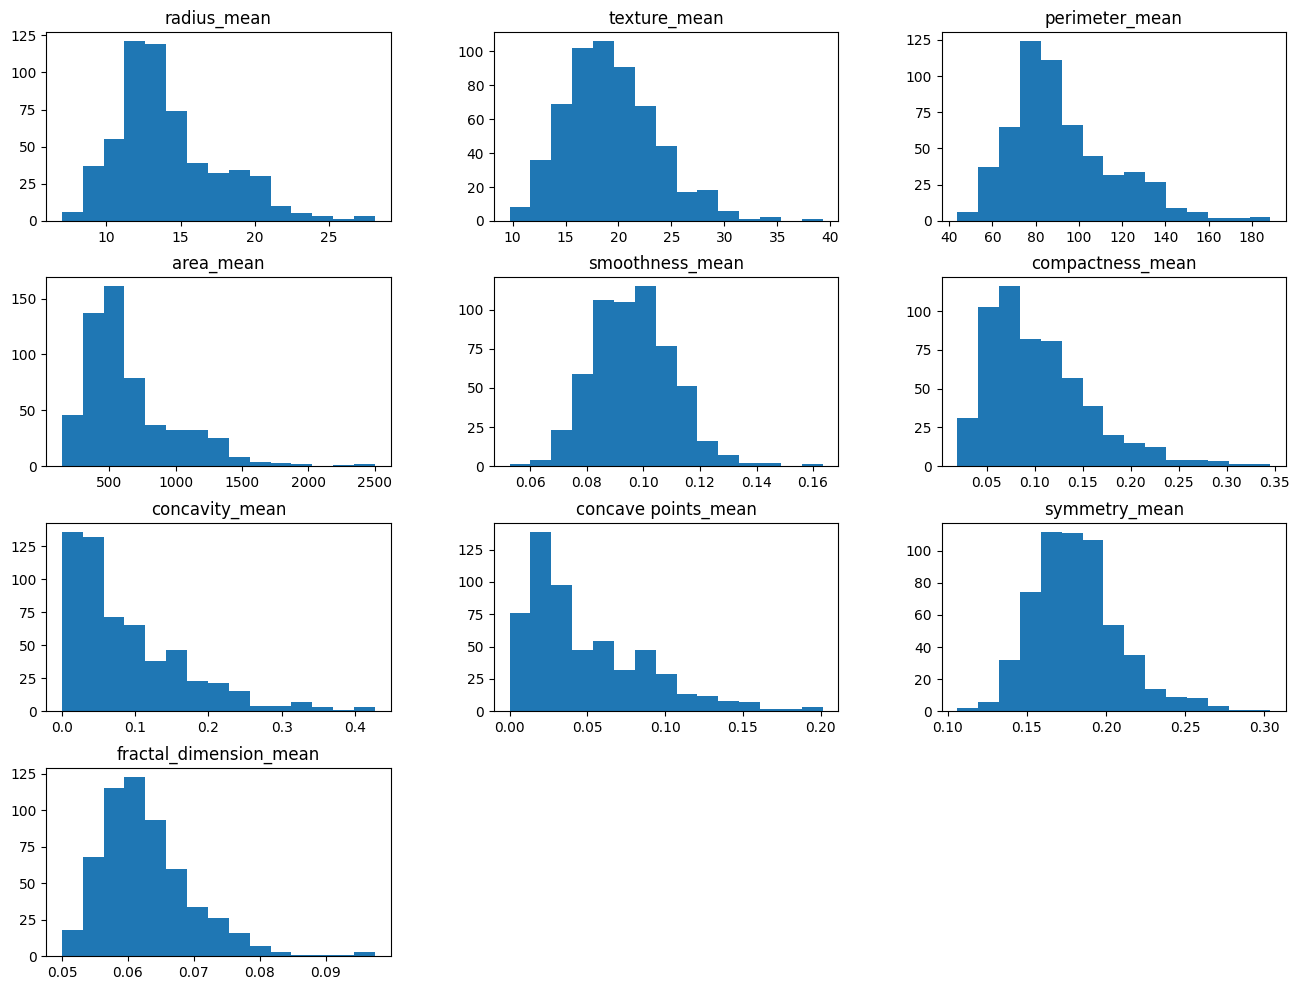

In [ ]:
#Plot histograms of CUT1 variables
hist_mean=df_mean.hist(bins=15, figsize=(16, 12),grid=False,)

#Any individual histograms, use this:
#df_cut['radius_worst'].hist(bins=100)

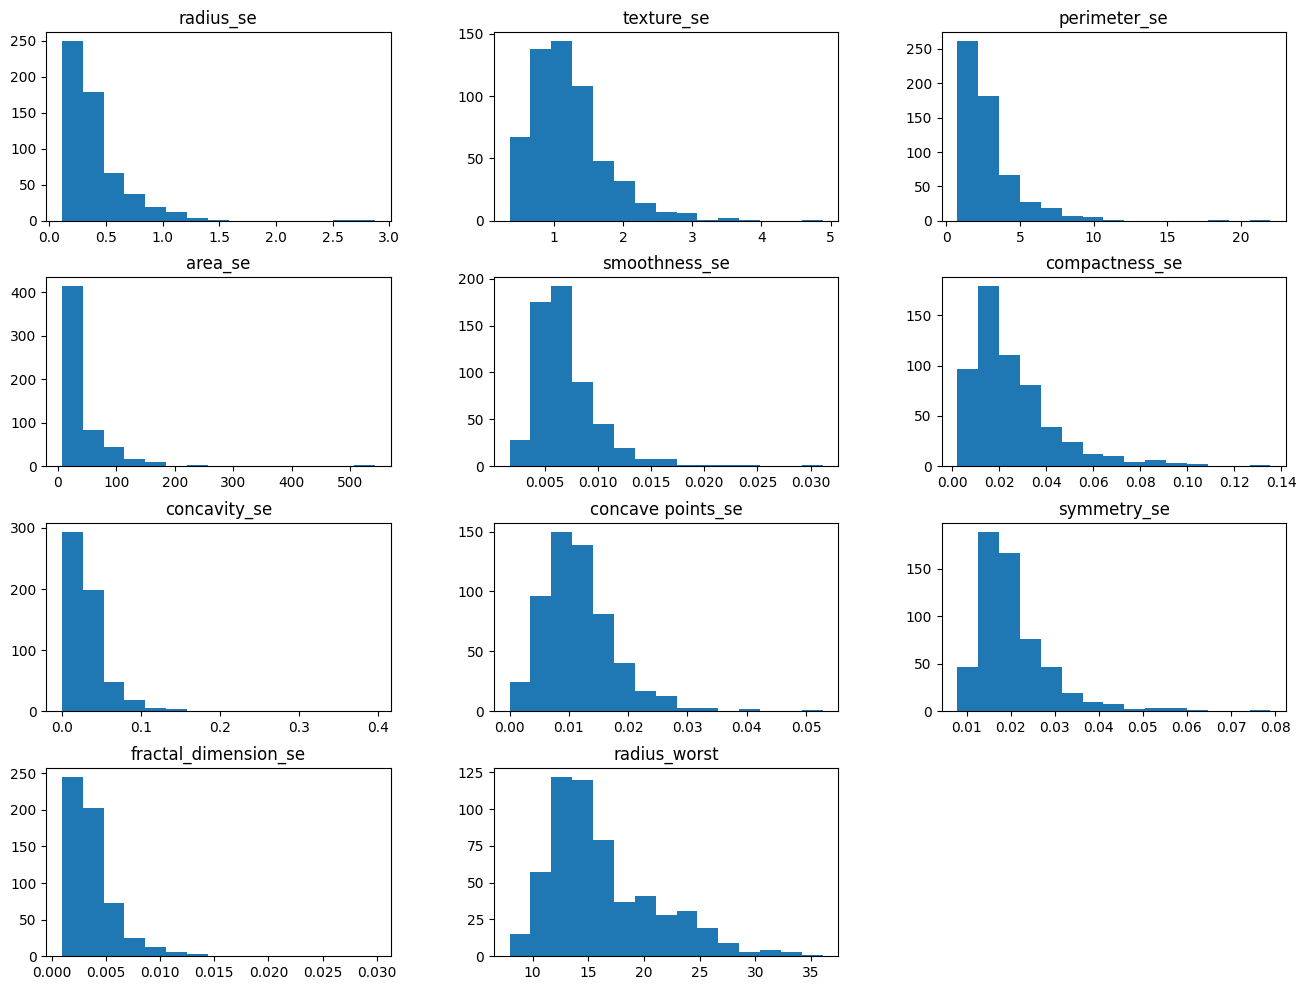

In [ ]:
#Plot histograms of _se variables
hist_se=df_se.hist(bins=15, figsize=(16, 12),grid=False,)

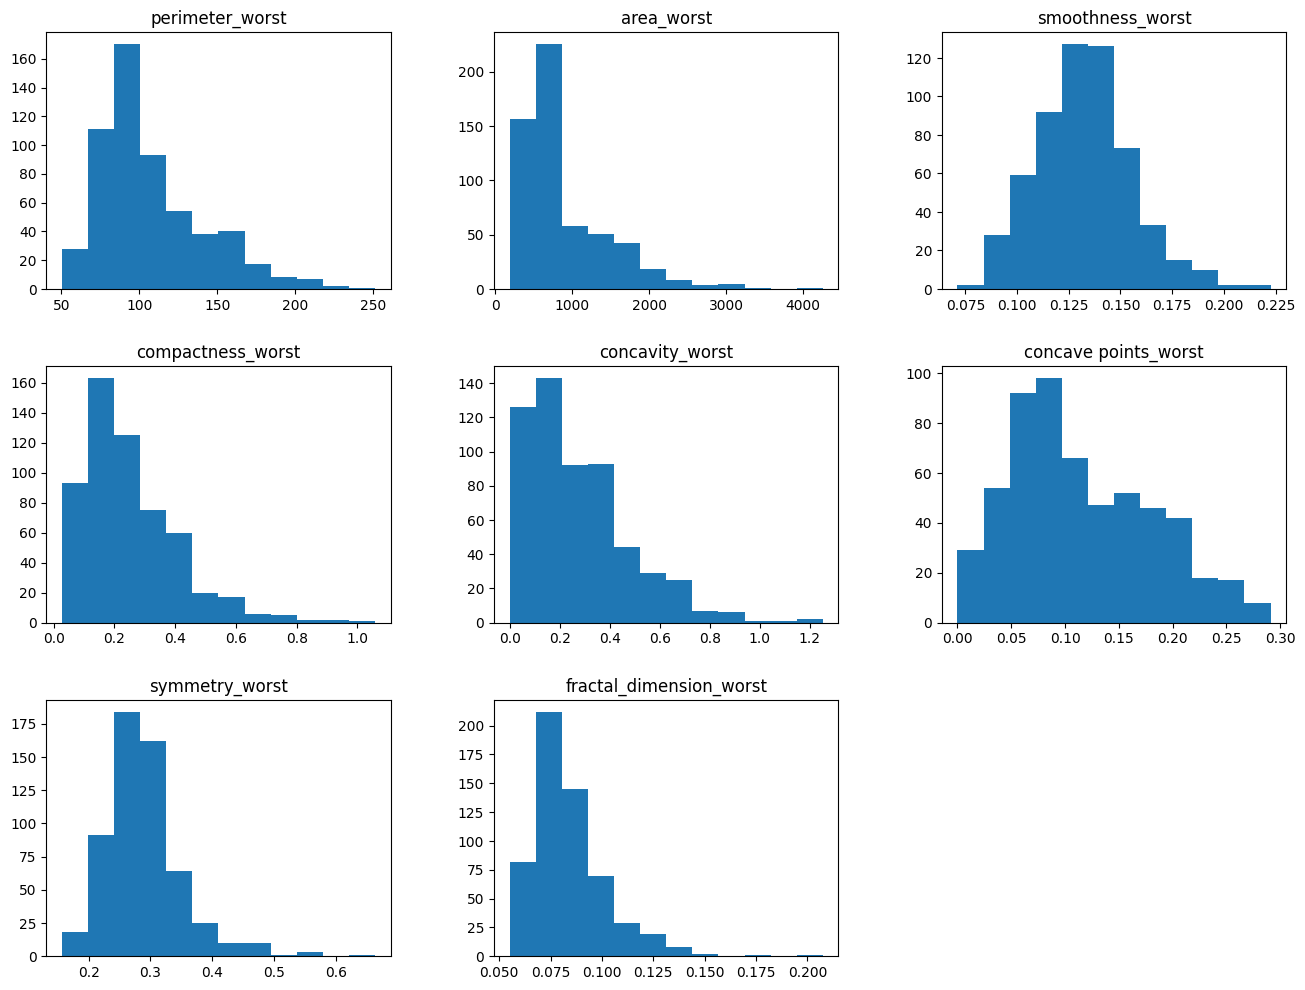

In [ ]:
#Plot histograms of _worst variables
hist_worst=df_worst.hist(bins=12, figsize=(16, 12),grid=False,)

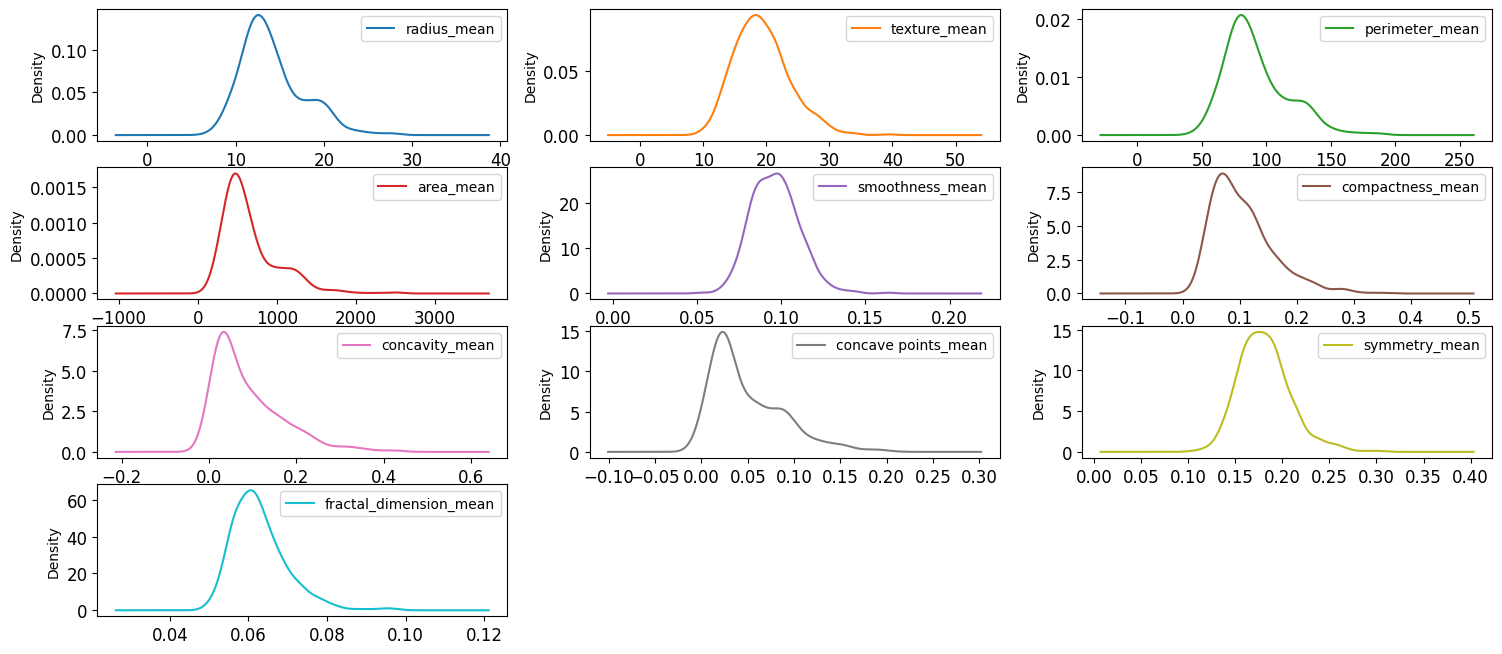

In [ ]:
#Density Plots
plt = df_mean.plot(kind= 'density', subplots=True, layout=(6,3), sharex=False,
                     sharey=False, fontsize=12, figsize=(18,12))

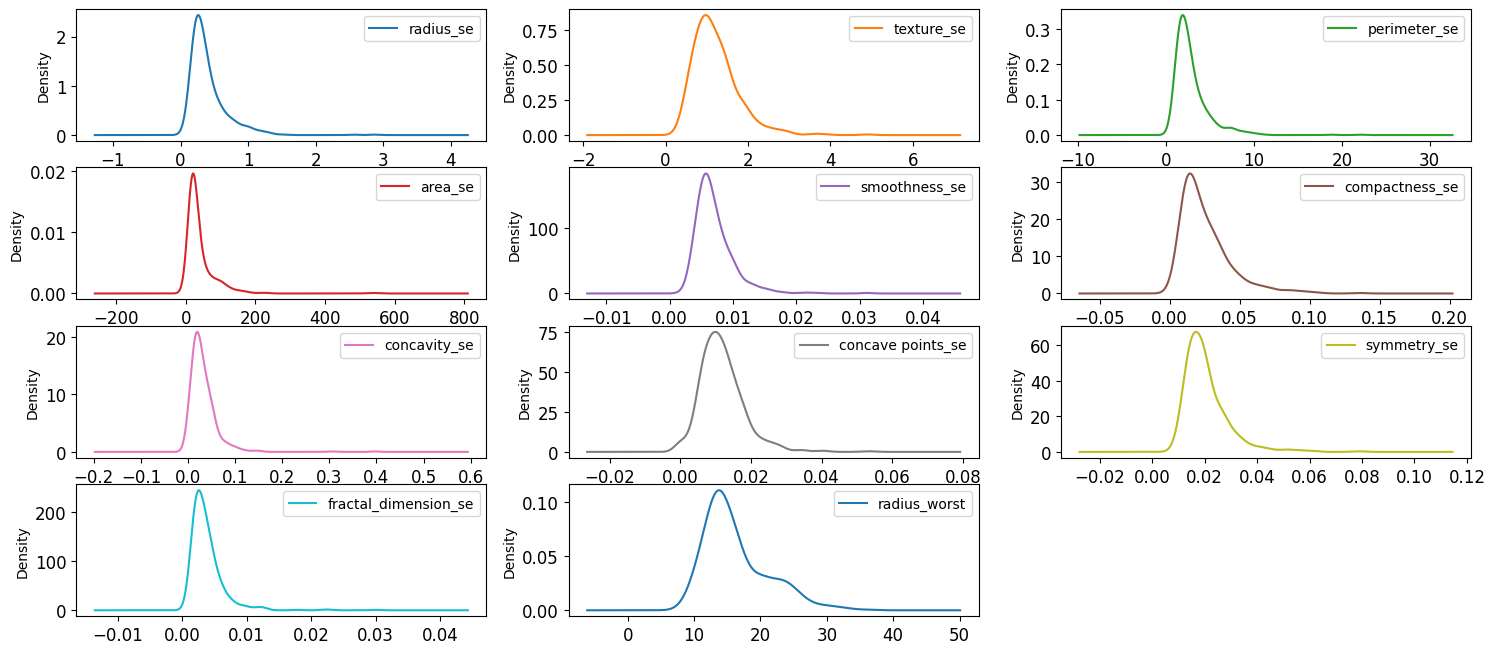

In [ ]:
#Density Plots
plt = df_se.plot(kind= 'density', subplots=True, layout=(6,3), sharex=False,
                    sharey=False, fontsize=12, figsize=(18,12))

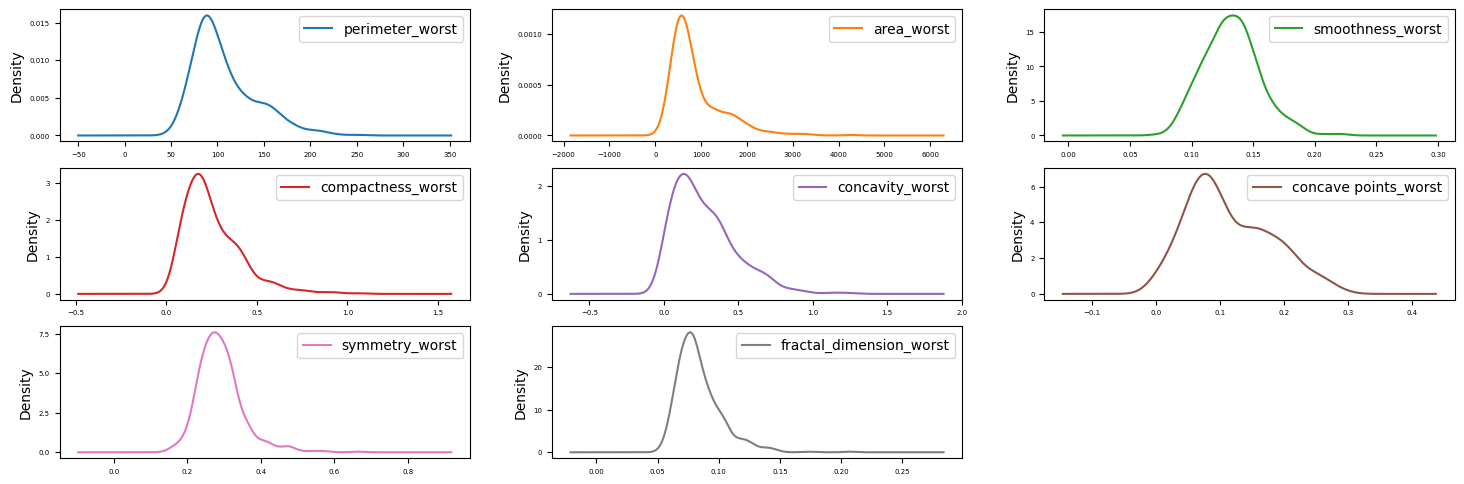

In [ ]:
#Density Plots
plt = df_worst.plot(kind= 'kde', subplots=True, layout=(6,3), sharex=False, sharey=False,
                    fontsize=5, figsize=(18,12))

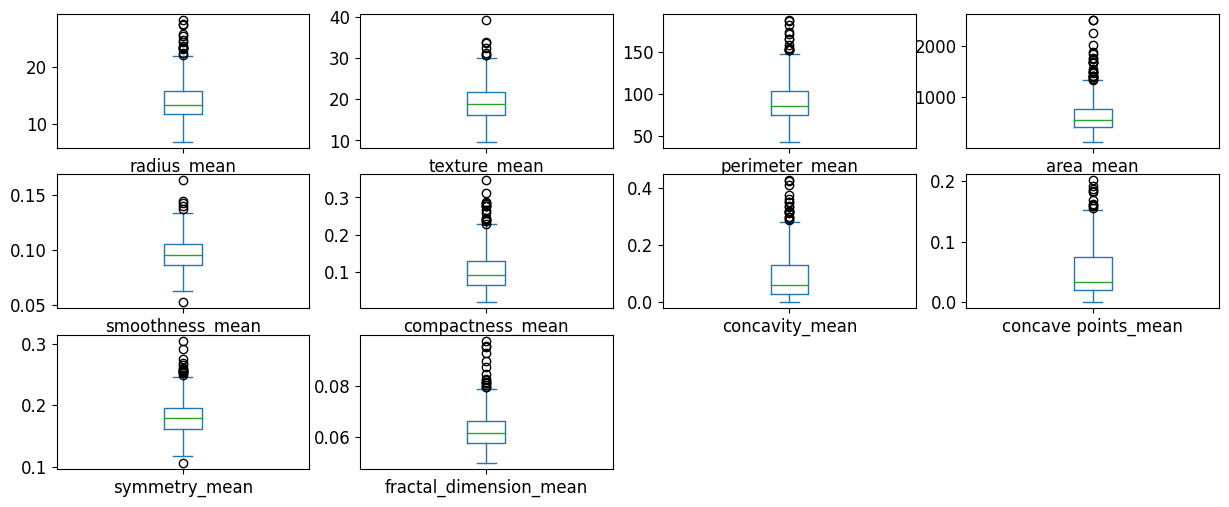

In [ ]:
# box and whisker plots
plt=df_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                 fontsize=12)

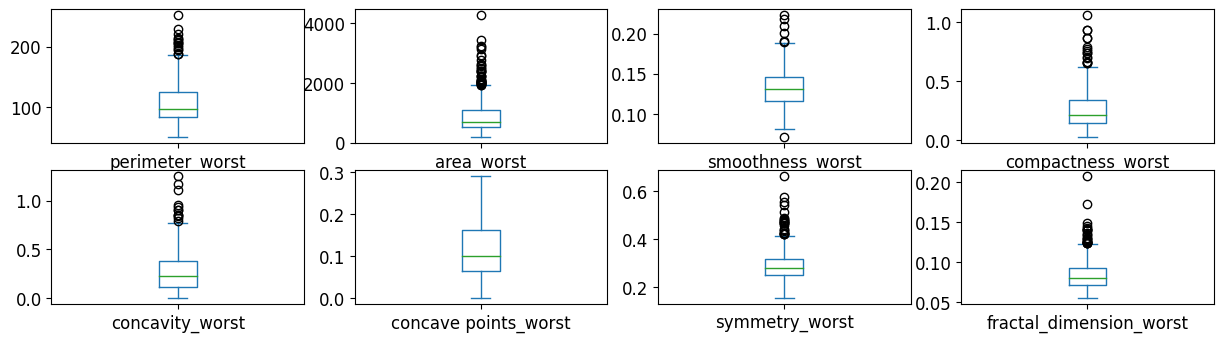

In [ ]:
# box and whisker plots
plt=df_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                  fontsize=12)

<ipython-input-28-c8a14cb31682>:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

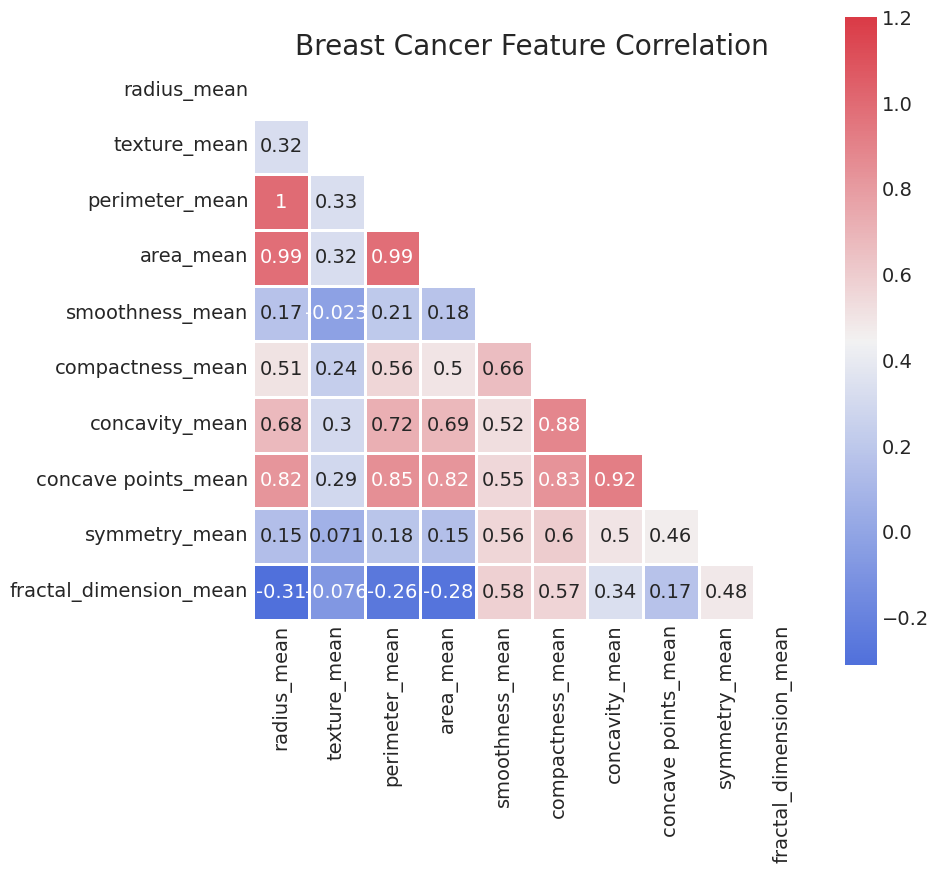

In [ ]:
# plot correlation matrix

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

#df = pd.read_csv('data/data_clean.csv', index_col=False)
#df.drop('Unnamed: 0',axis=1, inplace=True)

# Compute the correlation matrix
corr = df_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
df, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask,
            ax=ax,annot=True, fmt='.2g',linewidths=2)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

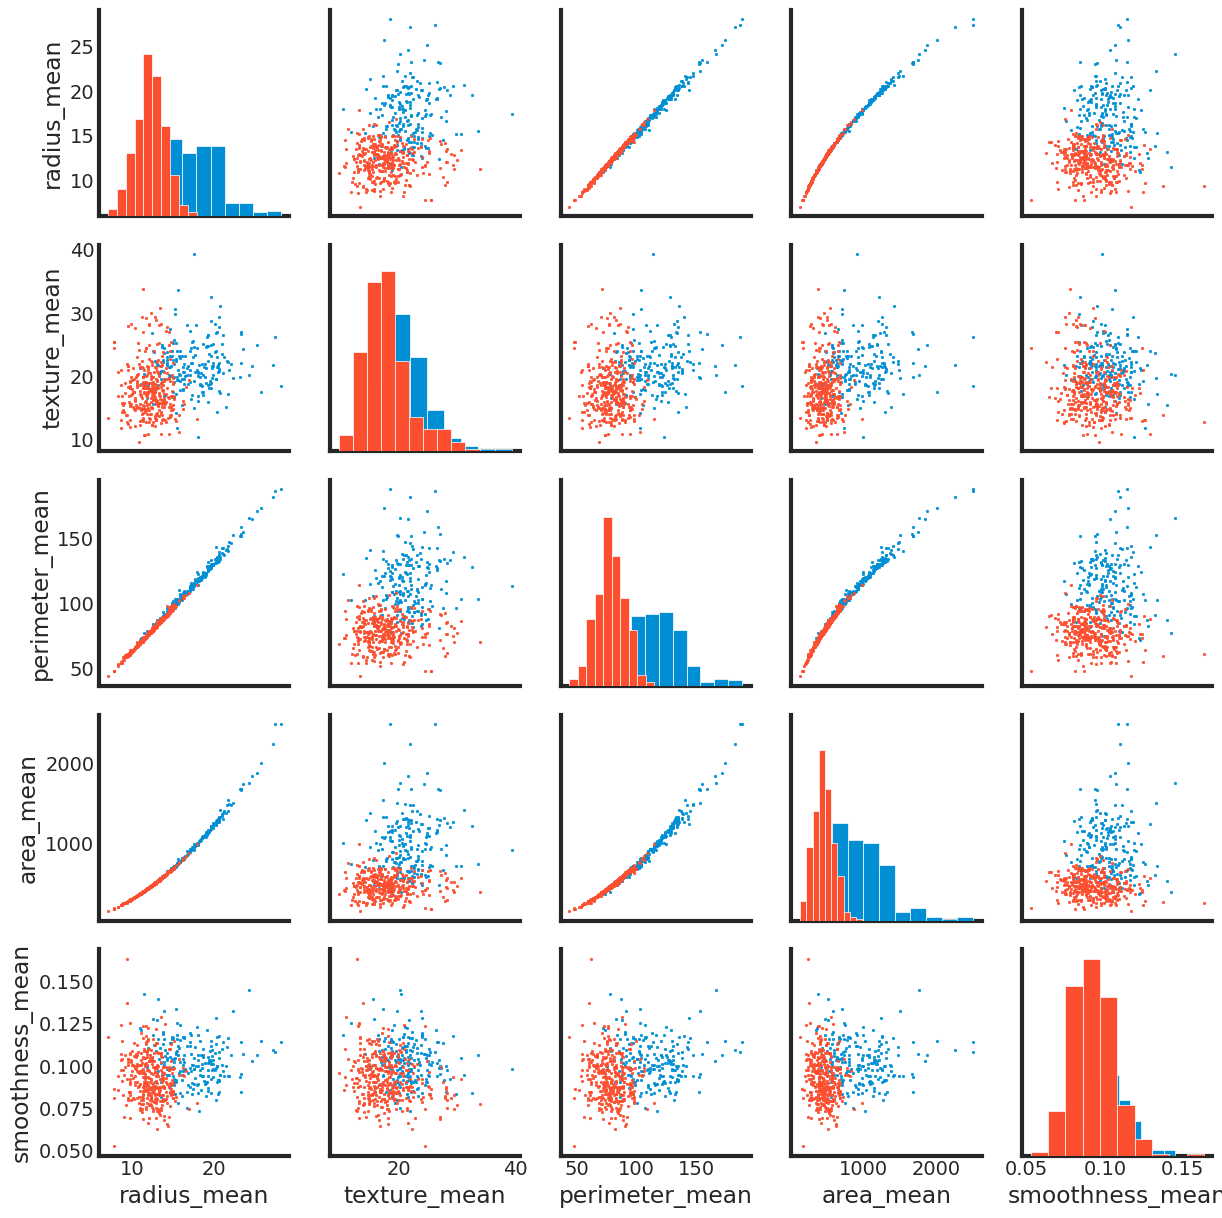

In [ ]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

df = pd.read_csv('BREAST_CANCER_DATA copy.csv', index_col=False)
g = sns.PairGrid(df[[df.columns[1],df.columns[2], df.columns[3],
                     df.columns[4], df.columns[5], df.columns[6]]], hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")


plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

df = pd.read_csv('BREAST_CANCER_DATA copy.csv', index_col=False)

df.head(3)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   
2  ...          25.53            152.5      1709.0            0.1444   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  

[3 rows x 33 columns]

In [ ]:
df.drop('Unnamed: 32', axis =1, inplace=True)

In [ ]:
array = df.values
X = array[:,1:31]
y = array[:,0]
X

array([['M', 17.99, 10.38, ..., 0.7119, 0.2654, 0.4601],
       ['M', 20.57, 17.77, ..., 0.2416, 0.186, 0.275],
       ['M', 19.69, 21.25, ..., 0.4504, 0.243, 0.3613],
       ...,
       ['M', 16.6, 28.08, ..., 0.3403, 0.1418, 0.2218],
       ['M', 20.6, 29.33, ..., 0.9387, 0.265, 0.4087],
       ['B', 7.76, 24.54, ..., 0.0, 0.0, 0.2871]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([ 41,  42, 488, 489, 490,  43,  44, 491,  45, 492,  46, 493,  47,
        48, 494, 495,  49, 496,  50, 385, 386, 387, 388,  51,  52,  53,
        54,  55,  56,  57,  58,  59, 497,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70, 498,  71, 499,   4,  72,  73,  74,  75,
        76,  77,  78, 500,  79,  80,  81,  82,  83,  84,  85,  86, 501,
        87,  88,  89,  90,  91,  92,  93,  94,  95, 389, 390, 391, 392,
       393, 394,  96, 395, 396, 397, 398, 399, 502, 503,  97,  98,  99,
       100, 101, 102, 103,   5,   6, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114,   7, 115, 116,   8,   9, 117, 118, 119, 120,
       121, 122, 123, 124,  10, 125, 126, 127,  11, 128, 129, 130, 131,
       132,   0, 504, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 505, 506, 147, 558, 559, 400,  12, 401, 402,
       403, 404, 148, 149, 405, 406, 150, 407, 408, 409,  13, 410, 411,
       412, 507,  14,  15, 151, 152, 153, 154, 508, 155, 156, 15

In [ ]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(df, test_size = 0.25, random_state= 42)

#Separate target label
train_y = train_df['diagnosis']
test_y = test_df['diagnosis']

#Drop target label
train_x = train_df.drop(['diagnosis'], axis = 1)
test_x = test_df.drop(['diagnosis'], axis = 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#build decision tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

#fit the tree to diabetes dataset
model.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

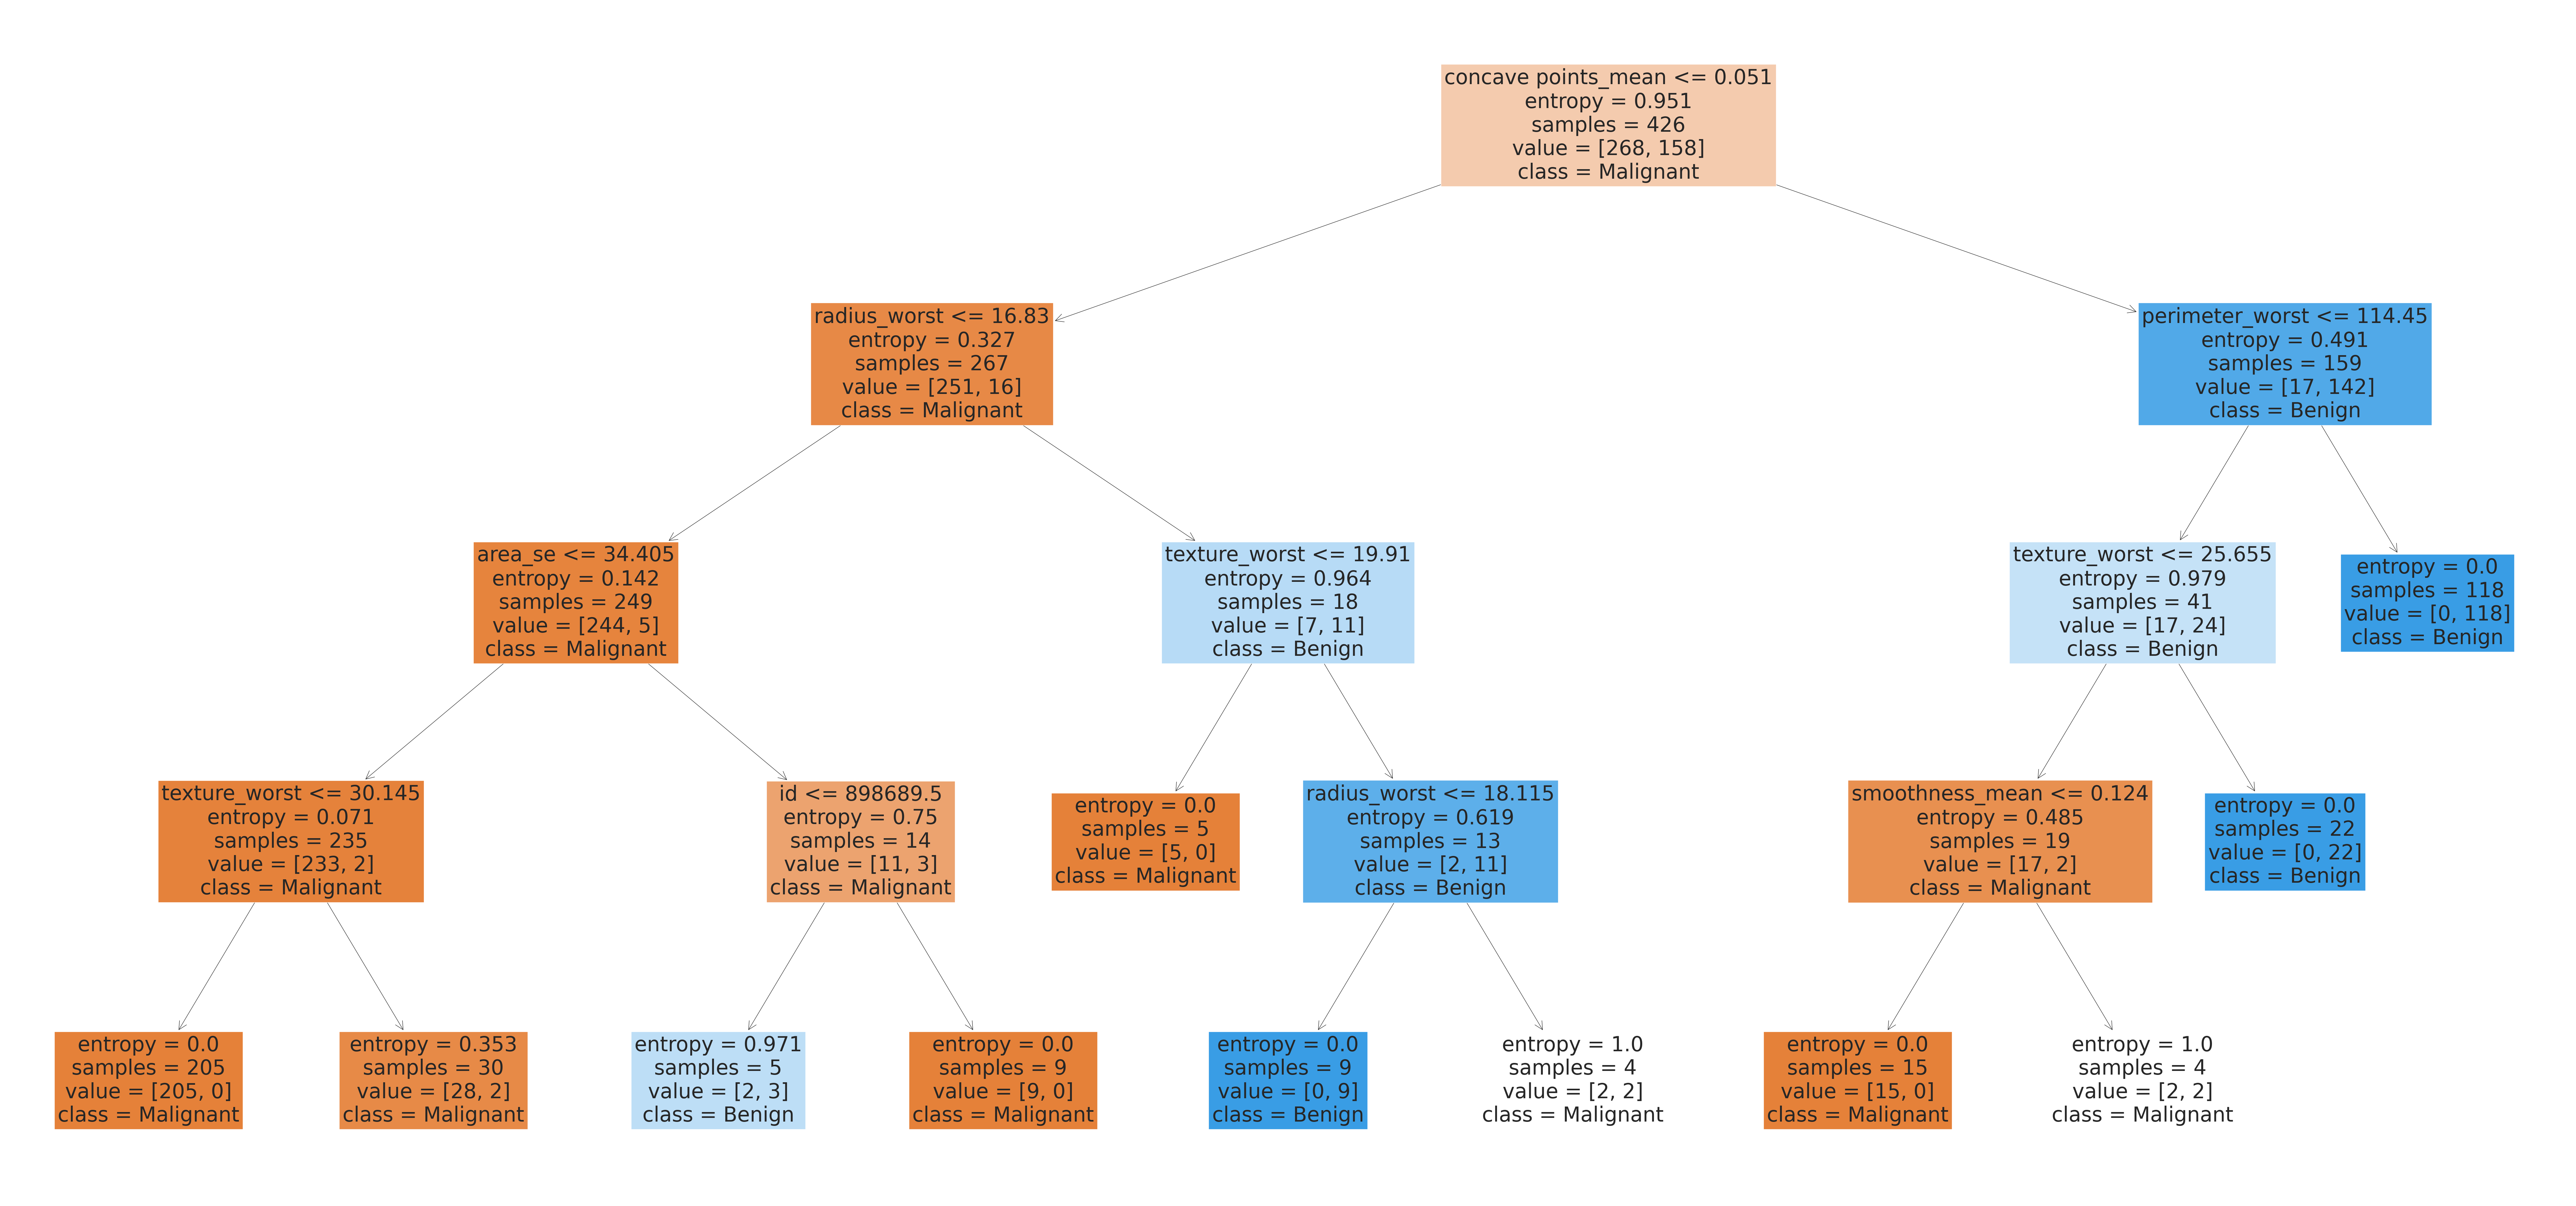

In [ ]:
from sklearn import tree

# features
features = [
    "id",
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "symmetry_mean",
    "fractal_dimension_mean",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "radius_worst",
    "texture_worst",
    "perimeter_worst",
    "area_worst",
    "smoothness_worst",
    "compactness_worst",
    "concavity_worst",
    "concave points_worst",
    "symmetry_worst",
    "fractal_dimension_worst"

]

classes = ['Malignant','Benign']


#figsize value changes the size of plot
fig, ax = plt.subplots(figsize=(48, 24), dpi=200)
tree.plot_tree(model,ax=ax,feature_names=features,class_names=classes, filled=True, fontsize=24)
plt.show()

In [ ]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    # When annot is set to True, it adds text annotations to each cell of the heatmap.
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
y_train_pred = model.predict(train_x)
y_test_pred  = model.predict(test_x)

Train score 0.9812206572769953
Test score 0.9440559440559441
Train Confusion matrix


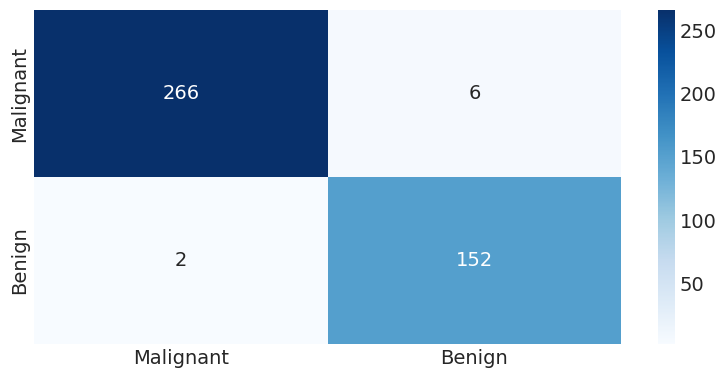

Test Confusion matrix


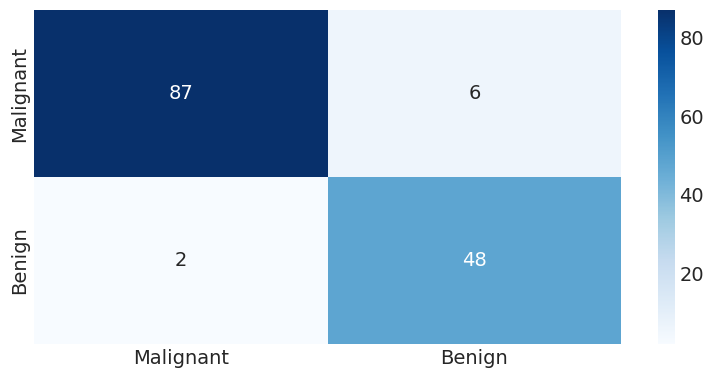

In [ ]:
print(f'Train score {accuracy_score(y_train_pred,train_y)}')
print(f'Test score {accuracy_score(y_test_pred,test_y)}')
plot_confusionmatrix(y_train_pred,train_y,dom='Train')
plot_confusionmatrix(y_test_pred,test_y,dom='Test')

## **Logistic Regression**

In [ ]:
df['diagnosis'] = [1 if i == "M"  else 0 for i in df['diagnosis']]

In [ ]:
#Split in 80% train and 20% test set
train_df, test_df = train_test_split(df, test_size = 0.2, random_state= 42)

#Separate target label
y_train = train_df['diagnosis']
y_test  = test_df['diagnosis']

#Drop target label
X_train = train_df.drop(['diagnosis'], axis = 1)
X_test = test_df.drop(['diagnosis'],   axis = 1)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Apply logistic regression model to training data
logreg_model = LogisticRegression(solver='liblinear', random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
# We shall use GridSearchCV with CrossValidation in order to determine the best hyperparameter
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l2']},
              {'C':[0.01, 0.1, 10, 100]}]


grid_search = GridSearchCV(estimator = logreg_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

# performing grid search on the training data set
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'penalty': ['l2']}, {'C': [0.01, 0.1, 10, 100]}],
             scoring='accuracy')

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.5932


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(random_state=42, solver='liblinear')


In [ ]:
# calculate GridSearch CV score on test set
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9386


In [ ]:
from sklearn.linear_model import LogisticRegression

# Apply logistic regression model to training data
model = LogisticRegression(penalty='l2',C = 100,random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.6228070175438597


In [ ]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

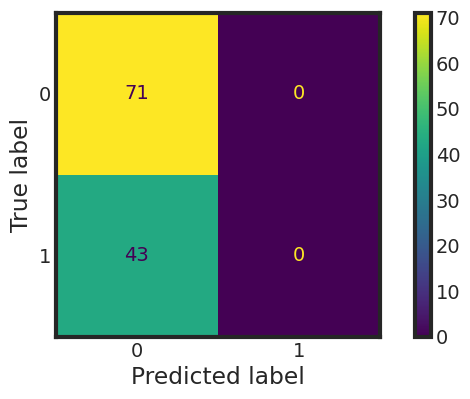

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

## **Pre Prunning**

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.metrics import recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
model = gcv.best_estimator_
print("Best Fit Model")
print(model)

Best Fit Model
DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)


Train score 0.9906103286384976
Test score 0.951048951048951
Train Confusion matrix


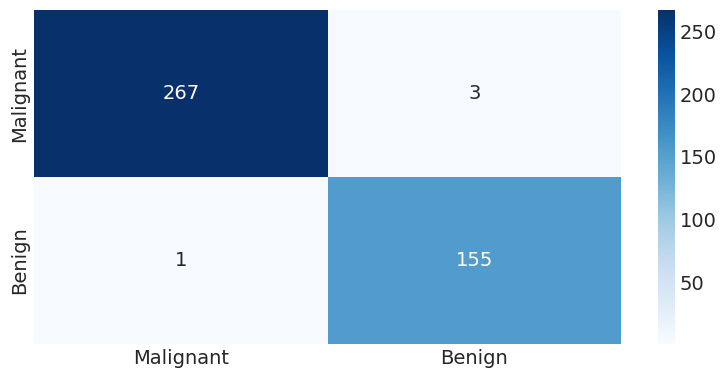

Test Confusion matrix


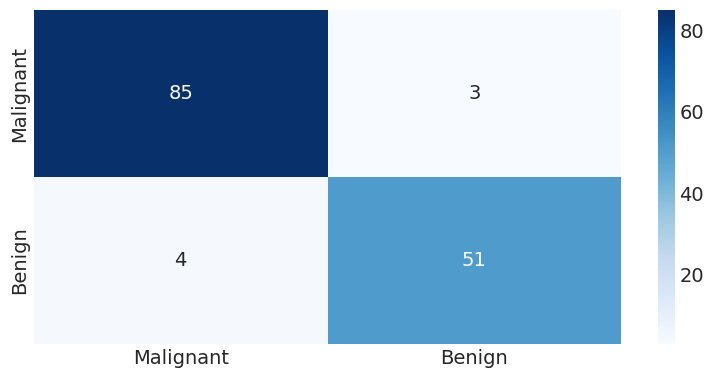

In [ ]:
model.fit(train_x,train_y)
y_train_pred = model.predict(train_x)
y_test_pred = model.predict(test_x)

print(f'Train score {accuracy_score(y_train_pred,train_y)}')
print(f'Test score {accuracy_score(y_test_pred,test_y)}')
plot_confusionmatrix(y_train_pred,train_y,dom='Train')
plot_confusionmatrix(y_test_pred,test_y,dom='Test')

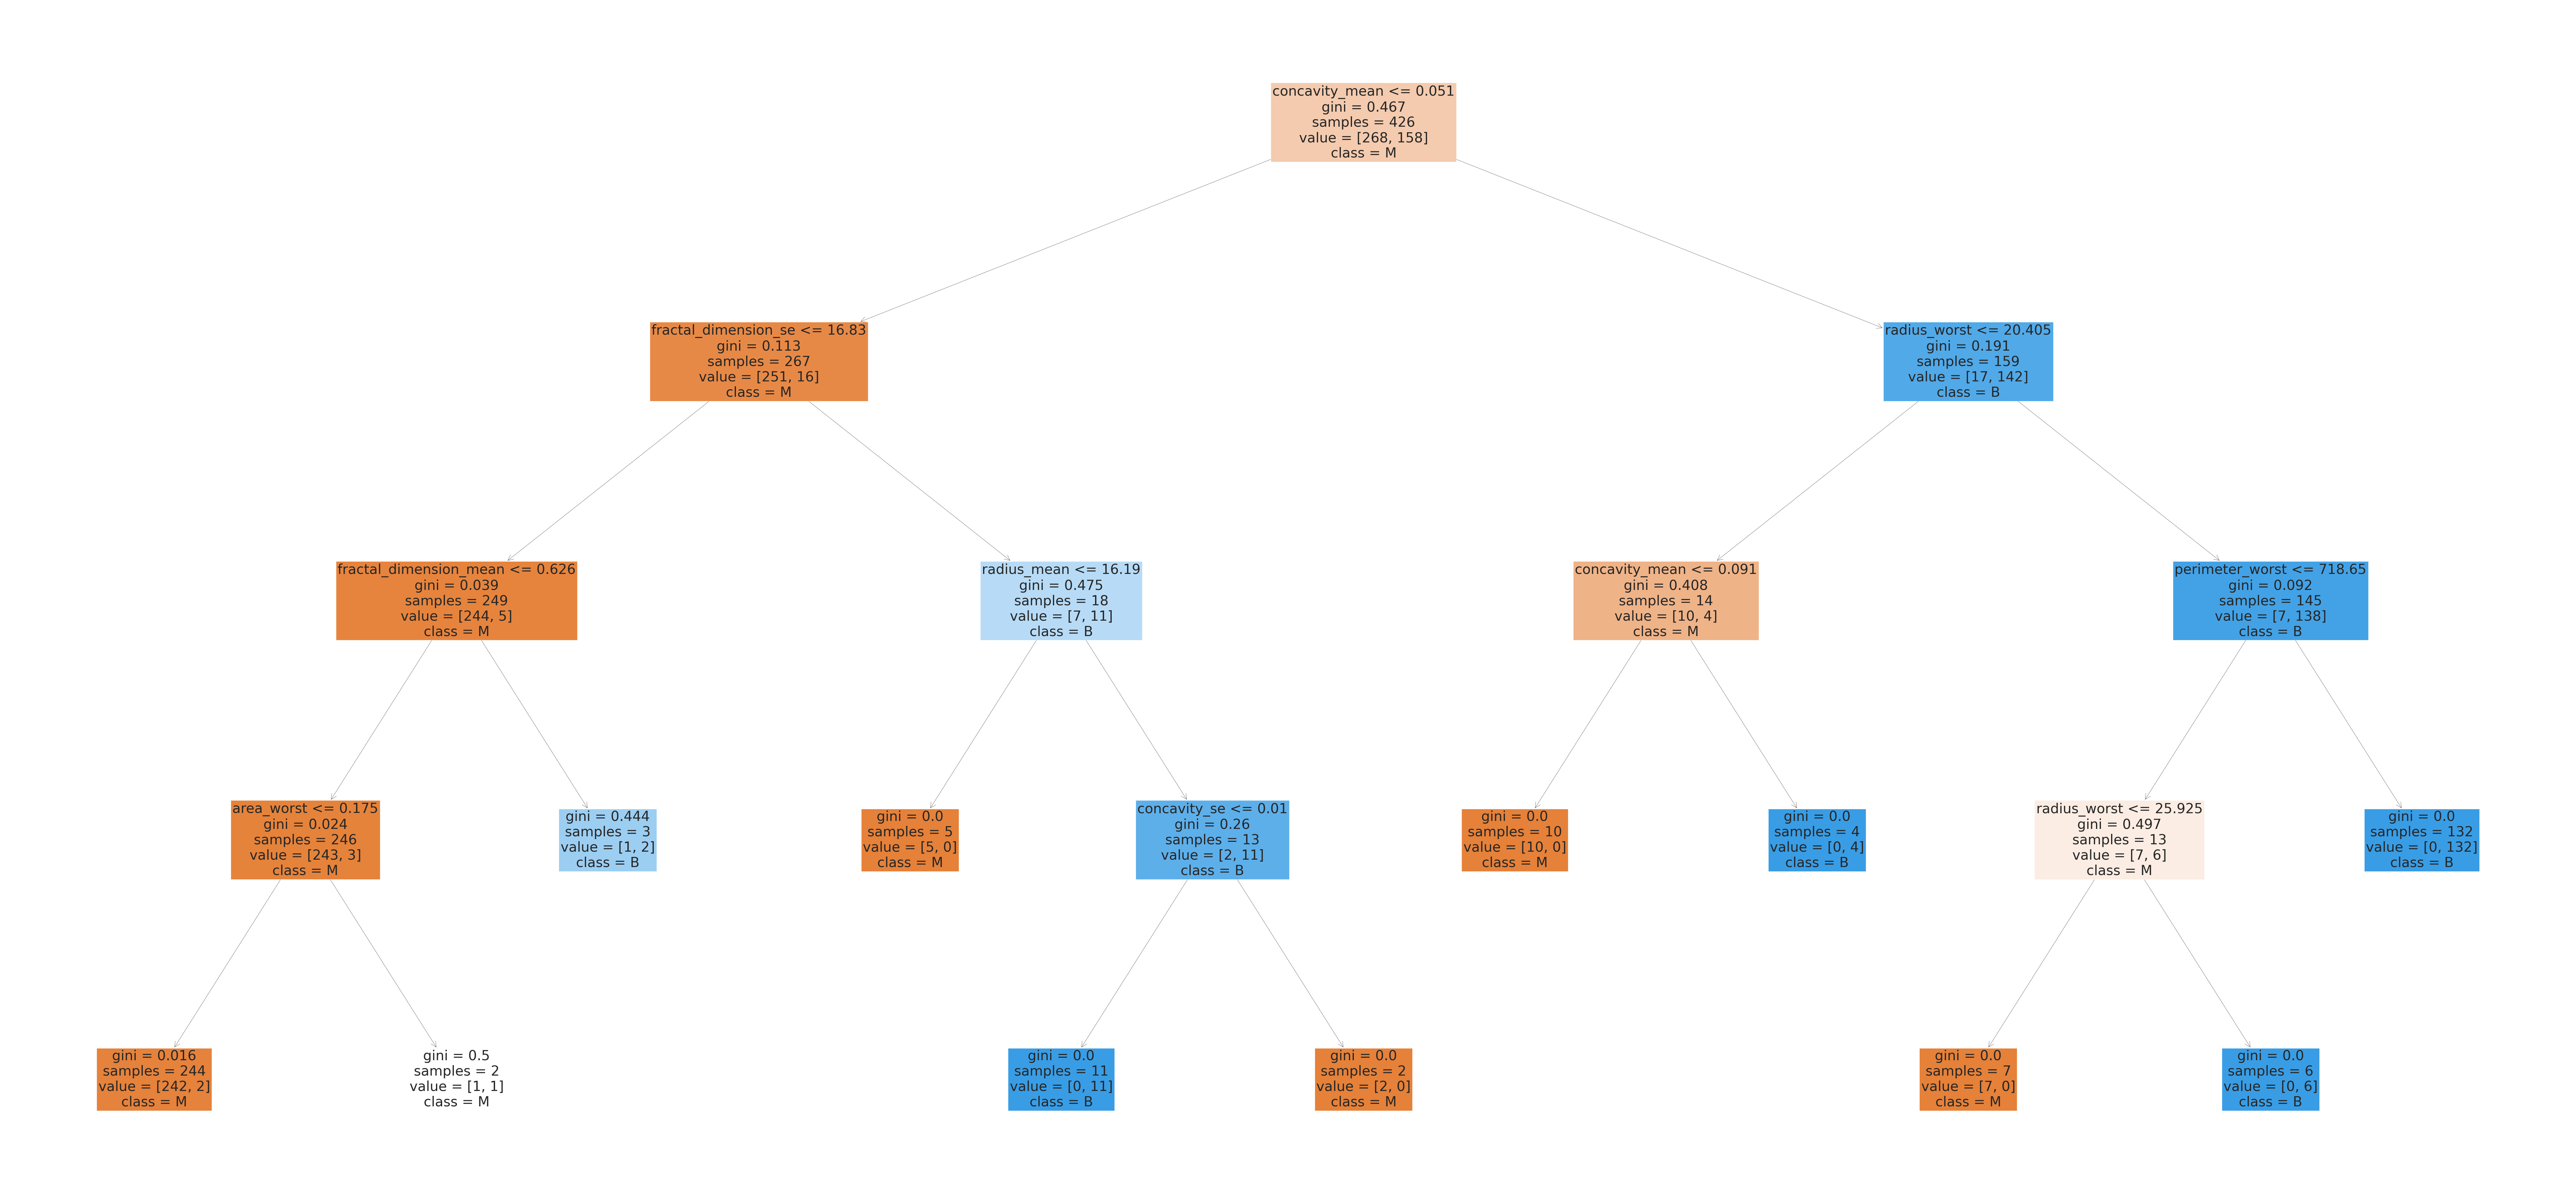

In [ ]:
fig, ax = plt.subplots(figsize=(96, 48), dpi=100)
features = df.columns
classes = ['M','B']

tree.plot_tree(model,ax=ax,feature_names=features,class_names=classes, filled=True, fontsize=32)
plt.show()

## **Post Prunning**

In [ ]:
path = model.cost_complexity_pruning_path(train_x, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00225262 0.00596017 0.00794511 0.01213836 0.01341382
 0.01516793 0.01610939 0.02658769 0.02752968 0.32476748]


In [ ]:
# For each alpha we will append our model to a list
models = []
for ccp_alpha in ccp_alphas:
    model = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(train_x, train_y)
    models.append(model)

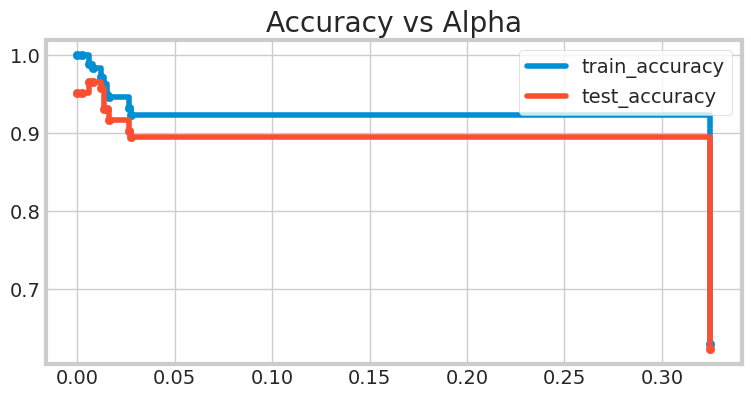

In [ ]:
train_acc = []
test_acc  = []

# The code iterates through trained models, predicting
# and storing their accuracy on both training and testing data.
# It uses scatter plots to show individual accuracies for each alpha value.
# Step plots connect accuracy points to visualize the trend as model complexity changes.
# The resulting graph, titled 'Accuracy vs Alpha', helps identify
# the optimal balance between model simplicity and accuracy.

for m in models:
    y_train_pred = m.predict(train_x)
    y_test_pred = m.predict(test_x)
    train_acc.append(accuracy_score(y_train_pred,train_y))
    test_acc.append(accuracy_score(y_test_pred,test_y))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

Train score 0.9882629107981221
Test score 0.965034965034965
Train Confusion matrix


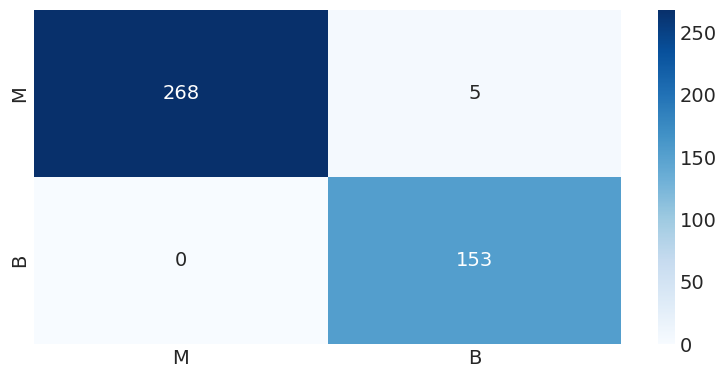

Test Confusion matrix


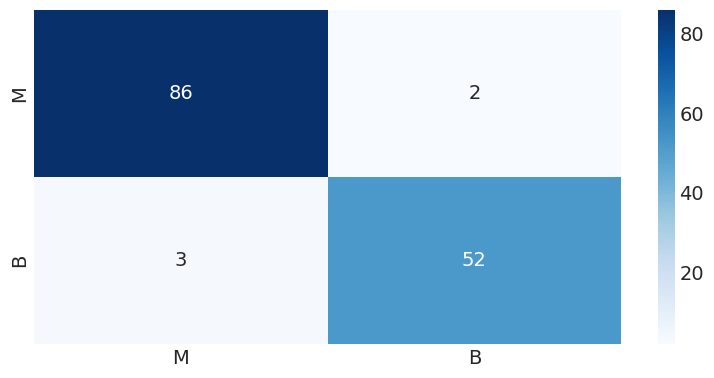

In [ ]:
model = tree.DecisionTreeClassifier(random_state=42,ccp_alpha=0.006)
model.fit(train_x,train_y)
y_train_pred = model.predict(train_x)
y_test_pred = model.predict(test_x)

print(f'Train score {accuracy_score(y_train_pred,train_y)}')
print(f'Test score {accuracy_score(y_test_pred,test_y)}')
plot_confusionmatrix(y_train_pred,train_y,dom='Train')
plot_confusionmatrix(y_test_pred,test_y,dom='Test')

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier

rfc = RandomForestClassifier(n_estimators=10,random_state=0)



# fit the model

rfc.fit(train_x, train_y)



# Predict the Test set results

y_pred = rfc.predict(test_x)



# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(test_y, y_pred)))

Model accuracy score with 10 decision-trees : 0.9580


In [ ]:

rfc_100 = RandomForestClassifier(n_estimators=15, random_state=0)



# fit the model to the training set

rfc_100.fit(train_x, train_y)



# Predict on the test set results

y_pred_100 = rfc_100.predict(test_x)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(test_y, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9650


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(train_x, train_y)

RandomForestClassifier(random_state=0)

In [ ]:

feature_scores = pd.Series(clf.feature_importances_, index=train_x.columns).sort_values(ascending=False)

feature_scores

concave points_worst       0.151579
radius_worst               0.108236
perimeter_worst            0.106512
area_worst                 0.084827
concave points_mean        0.077692
concavity_mean             0.057930
radius_mean                0.057458
area_mean                  0.045730
area_se                    0.042709
perimeter_mean             0.041836
concavity_worst            0.040091
symmetry_worst             0.022142
texture_mean               0.016745
compactness_worst          0.016060
perimeter_se               0.015995
radius_se                  0.015844
texture_worst              0.015700
smoothness_worst           0.014784
compactness_mean           0.008862
concave points_se          0.006962
texture_se                 0.006742
id                         0.006577
concavity_se               0.005007
symmetry_mean              0.004999
smoothness_mean            0.004840
fractal_dimension_mean     0.004398
fractal_dimension_se       0.004088
smoothness_se              0

## **K Nearest Neighbor **

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']
#X = np.array(df.iloc[:, 1:])
#y = np.array(df['diagnosis'])



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.96      0.97       121
           M       0.93      0.96      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.96      0.95       188
weighted avg       0.96      0.96      0.96       188



CROSS VALIDATION

In [ ]:
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
	neighbors.append(k)
	knn = KNeighborsClassifier(n_neighbors = k)
	scores = cross_val_score(
		knn, X_train, y_train, cv = 10, scoring = 'accuracy')
	cv_scores.append(scores.mean())


The optimal number of neighbors is  7 


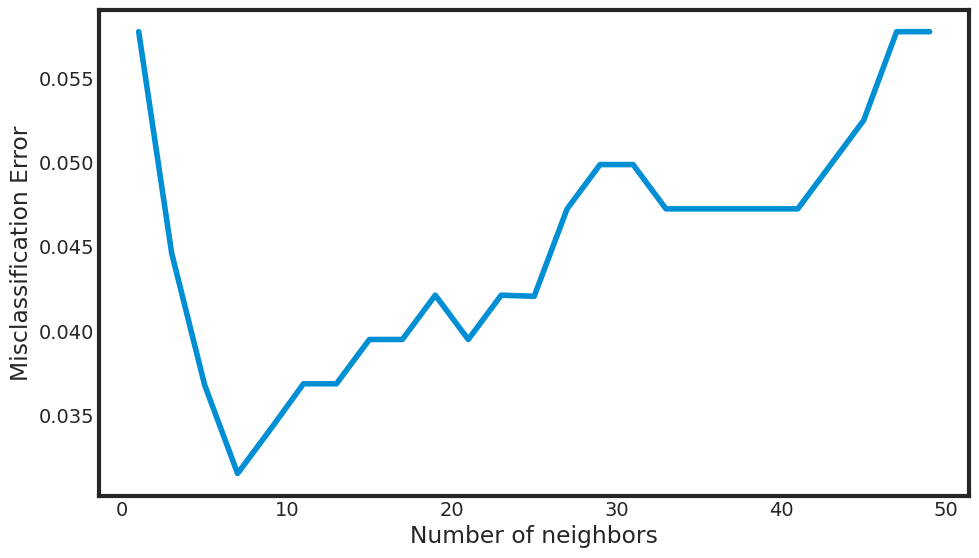

In [ ]:
MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()
